In [65]:
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
import numpy as np 
import pandas as pd
from pyspark.mllib.clustering import KMeans,KMeansModel
import matplotlib.pyplot as plt 

In [2]:
sc=SparkContext("local[2]","regression").getOrCreate()
ssc=StreamingContext(sc,1)

In [39]:
data=sc.textFile("C1.txt")

In [40]:
data.take(10)

['    624474    837604',
 '    673412    735362',
 '    647442    677000',
 '    532283    741384',
 '    646529    742844',
 '    647535    755101',
 '    644131    777721',
 '    521368    736923',
 '    688940    798967',
 '    592666    805244']

In [41]:
splited=data.map(lambda line:[x for x in line.split(' ')])


In [42]:
splited.take(10)

[['', '', '', '', '624474', '', '', '', '837604'],
 ['', '', '', '', '673412', '', '', '', '735362'],
 ['', '', '', '', '647442', '', '', '', '677000'],
 ['', '', '', '', '532283', '', '', '', '741384'],
 ['', '', '', '', '646529', '', '', '', '742844'],
 ['', '', '', '', '647535', '', '', '', '755101'],
 ['', '', '', '', '644131', '', '', '', '777721'],
 ['', '', '', '', '521368', '', '', '', '736923'],
 ['', '', '', '', '688940', '', '', '', '798967'],
 ['', '', '', '', '592666', '', '', '', '805244']]

In [43]:
x_data=splited.map(lambda x:x[4])
y_data=splited.map(lambda x:x[8])

In [44]:
df=pd.DataFrame([x_data.collect(),y_data.collect()]).transpose()

In [68]:
train_data=df
train_data=train_data.replace('',0,regex=True)

In [69]:
train_data=train_data.astype('float')
train_data=train_data.to_numpy()

In [70]:
model=KMeans.train(sc.parallelize(train_data),k=27)

In [71]:
model.computeCost(sc.parallelize(train_data))

10425364864643.062

In [78]:
center=model.clusterCenters
cx=[x[0] for x in center]
cy=[x[1] for x in center]

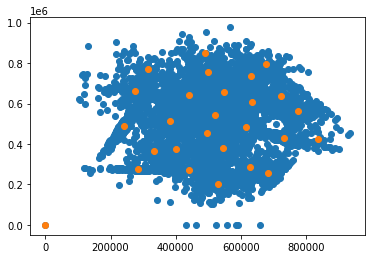

In [79]:
plt.scatter(train_data[:,0],train_data[:,1])
plt.scatter(cx,cy)